### Kamus dan Dataset

---


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.0 MB/s eta 0:00:00


In [ ]:
#dataset
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1VmQcf7juv5LV4IXZv4NS6bXVU4aupyyd' -O 'data1.csv'

#slang words dictonary
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1_ilSZKJ87xLz4zIbEeacYOYaxhlbadYy' -O 'combined_slang_words.txt'

--2023-01-15 18:09:16--  https://drive.google.com/uc?export=download&id=1VmQcf7juv5LV4IXZv4NS6bXVU4aupyyd
Resolving drive.google.com (drive.google.com)... 173.194.193.100, 173.194.193.113, 173.194.193.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.193.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/74agoqr7jqq6s11tsfordcrmmhjts29d/1673806125000/08896063692371262502/*/1VmQcf7juv5LV4IXZv4NS6bXVU4aupyyd?e=download&uuid=0dd6dcfe-d4e6-4650-890d-091d3881a7ba [following]
--2023-01-15 18:09:16--  https://doc-0o-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/74agoqr7jqq6s11tsfordcrmmhjts29d/1673806125000/08896063692371262502/*/1VmQcf7juv5LV4IXZv4NS6bXVU4aupyyd?e=download&uuid=0dd6dcfe-d4e6-4650-890d-091d3881a7ba
Resolving doc-0o-8o-docs.googleusercontent.com (doc-0o-8o-docs.googleusercontent.com)... 74.125.201.132, 2

### Importing Library

---



In [ ]:
# Common
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import ast
import re

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

# Stemmer Package Khusus Bahasa Indonesia 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer

# Matrix Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 1.1 Preprocessing Data

---

In [ ]:
class PreprocessData():
    
    def processRow(self,data):
        """
        Membersihkan kata yang mengandung url, unicode, username, huruf tunggal, dsb
        """
        preprocessDone = []
        for tweet in range(0, len(data)):
            #remove unicode
            tweet = data[tweet].encode().decode('unicode_escape')
            tweet = tweet.encode('ascii', errors='ignore').decode('utf-8')
            
            #remove url
            tweet = re.sub('((www.\.[^\s]+)|(https?://[^\s]+))','', tweet)
            
            #remove @username
            tweet = re.sub('@[^\s]+','', tweet)
            
            #remove all the special character
            tweet = re.sub(r'\W', ' ', tweet)
            
            #remove single characters from the start
            tweet = re.sub(r'\^[A-Za-z]\s+', ' ', tweet)
            tweet = re.sub(r'[0-9]+', '', tweet)#remove number
            tweet = re.sub(r'^b\s+', '', tweet)#removing prefixed 'b'
            
            #remove all single character
            tweet = re.sub(r'\s+[A-Za-z]\s+', ' ', tweet)
            
            #substituting multiple spaces with single space
            tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)
            
            #convert to lower case
            tweet = tweet.lower()
            preprocessDone.append(tweet)
        return preprocessDone
    
    def stopwordRemoval(self, data):
        '''
        Mengapus stopwords/ kata tidak perlu dalam pembobotan sentimen
        '''
        stopword = ['a','ada','adalah','adanya','adapun','agak','agaknya','agar','akan','akankah','akhir',
            'akhiri','akhirnya','aku','akulah','amat','amatlah','anda','andalah','antar','antara',
            'antaranya','apa','apaan','apabila','apakah','apalagi','apatah','arti','artinya','asal',
            'asalkan','atas','atau','ataukah','ataupun','awal','awalnya','b','bagai','bagaikan',
            'bagaimana','bagaimanakah','bagaimanapun','bagainamakah','bagi','bagian','bahkan','bahwa',
            'bahwasannya','bahwasanya','baik','baiklah','bakal','bakalan','balik','banyak','bapak',
            'baru','bawah','beberapa','begini','beginian','beginikah','beginilah','begitu','begitukah',
            'begitulah','begitupun','bekerja','belakang','belakangan','belum','belumlah','benar',
            'benarkah','benarlah','berada','berakhir','berakhirlah','berakhirnya','berapa','berapakah',
            'berapalah','berapapun','berarti','berawal','berbagai','berdatangan','beri','berikan',
            'berikut','berikutnya','berjumlah','berkali-kali','berkata','berkehendak','berkeinginan',
            'berkenaan','berlainan','berlalu','berlangsung','berlebihan','bermacam','bermacam-macam',
            'bermaksud','bermula','bersama','bersama-sama','bersiap','bersiap-siap','bertanya',
            'bertanya-tanya','berturut','berturut-turut','bertutur','berujar','berupa','besar',
            'betul','betulkah','biasa','biasanya','bila','bilakah','bisa','bisakah','boleh','bolehkah',
            'bolehlah','buat','bukan','bukankah','bukanlah','bukannya','bulan','bung','c','cara',
            'caranya','cukup','cukupkah','cukuplah','cuma','d','dahulu','dalam','dan','dapat','dari',
            'daripada','datang','dekat','demi','demikian','demikianlah','dengan','depan','di','dia',
            'diakhiri','diakhirinya','dialah','diantara','diantaranya','diberi','diberikan','diberikannya',
            'dibuat','dibuatnya','didapat','didatangkan','digunakan','diibaratkan','diibaratkannya',
            'diingat','diingatkan','diinginkan','dijawab','dijelaskan','dijelaskannya','dikarenakan',
            'dikatakan','dikatakannya','dikerjakan','diketahui','diketahuinya','dikira','dilakukan',
            'dilalui','dilihat','dimaksud','dimaksudkan','dimaksudkannya','dimaksudnya','diminta',
            'dimintai','dimisalkan','dimulai','dimulailah','dimulainya','dimungkinkan','dini','dipastikan',
            'diperbuat','diperbuatnya','dipergunakan','diperkirakan','diperlihatkan','diperlukan',
            'diperlukannya','dipersoalkan','dipertanyakan','dipunyai','diri','dirinya','disampaikan',
            'disebut','disebutkan','disebutkannya','disini','disinilah','ditambahkan','ditandaskan',
            'ditanya','ditanyai','ditanyakan','ditegaskan','ditujukan','ditunjuk','ditunjuki','ditunjukkan',
            'ditunjukkannya','ditunjuknya','dituturkan','dituturkannya','diucapkan','diucapkannya',
            'diungkapkan','dong','dua','dulu','e','empat','enak','enggak','enggaknya','entah','entahlah',
            'f','g','guna','gunakan','h','hadap','hai','hal','halo','hallo','hampir','hanya','hanyalah',
            'hari','harus','haruslah','harusnya','helo','hello','hendak','hendaklah','hendaknya','hingga',
            'i','ia','ialah','ibarat','ibaratkan','ibaratnya','ibu','ikut','ingat','ingat-ingat','ingin',
            'inginkah','inginkan','ini','inikah','inilah','itu','itukah','itulah','j','jadi','jadilah',
            'jadinya','jangan','jangankan','janganlah','jauh','jawab','jawaban','jawabnya','jelas',
            'jelaskan','jelaslah','jelasnya','jika','jikalau','juga','jumlah','jumlahnya','justru',
            'k','kadar','kala','kalau','kalaulah','kalaupun','kali','kalian','kami','kamilah','kamu',
            'kamulah','kan','kapan','kapankah','kapanpun','karena','karenanya','kasus','kata','katakan',
            'katakanlah','katanya','ke','keadaan','kebetulan','kecil','kedua','keduanya','keinginan',
            'kelamaan','kelihatan','kelihatannya','kelima','keluar','kembali','kemudian','kemungkinan',
            'kemungkinannya','kena','kenapa','kepada','kepadanya','kerja','kesampaian','keseluruhan',
            'keseluruhannya','keterlaluan','ketika','khusus','khususnya','kini','kinilah','kira',
            'kira-kira','kiranya','kita','kitalah','kok','kurang','l','lagi','lagian','lah','lain',
            'lainnya','laku','lalu','lama','lamanya','langsung','lanjut','lanjutnya','lebih','lewat',
            'lihat','lima','luar','m','macam','maka','makanya','makin','maksud','malah','malahan',
            'mampu','mampukah','mana','manakala','manalagi','masa','masalah','masalahnya','masih',
            'masihkah','masing','masing-masing','masuk','mata','mau','maupun','melainkan','melakukan',
            'melalui','melihat','melihatnya','memang','memastikan','memberi','memberikan','membuat',
            'memerlukan','memihak','meminta','memintakan','memisalkan','memperbuat','mempergunakan',
            'memperkirakan','memperlihatkan','mempersiapkan','mempersoalkan','mempertanyakan','mempunyai',
            'memulai','memungkinkan','menaiki','menambahkan','menandaskan','menanti','menanti-nanti',
            'menantikan','menanya','menanyai','menanyakan','mendapat','mendapatkan','mendatang','mendatangi',
            'mendatangkan','menegaskan','mengakhiri','mengapa','mengatakan','mengatakannya','mengenai',
            'mengerjakan','mengetahui','menggunakan','menghendaki','mengibaratkan','mengibaratkannya',
            'mengingat','mengingatkan','menginginkan','mengira','mengucapkan','mengucapkannya','mengungkapkan',
            'menjadi','menjawab','menjelaskan','menuju','menunjuk','menunjuki','menunjukkan','menunjuknya',
            'menurut','menuturkan','menyampaikan','menyangkut','menyatakan','menyebutkan','menyeluruh',
            'menyiapkan','merasa','mereka','merekalah','merupakan','meski','meskipun','meyakini','meyakinkan',
            'minta','mirip','misal','misalkan','misalnya','mohon','mula','mulai','mulailah','mulanya','mungkin',
            'mungkinkah','n','nah','naik','namun','nanti','nantinya','nya','nyaris','nyata','nyatanya',
            'o','oleh','olehnya','orang','org','p','pada','padahal','padanya','pak','paling','panjang','pantas',
            'para','pasti','pastilah','penting','pentingnya','per','percuma','perlu','perlukah','perlunya',
            'pernah','persoalan','pertama','pertama-tama','pertanyaan','pertanyakan','pihak','pihaknya',
            'pukul','pula','pun','punya','q','r','rasa','rasanya','rupa','rupanya','s','saat','saatnya','saja',
            'sajalah','salam','saling','sama','sama-sama','sambil','sampai','sampai-sampai','sampaikan','sana',
            'sangat','sangatlah','sangkut','satu','saya','sayalah','se','sebab','sebabnya','sebagai',
            'sebagaimana','sebagainya','sebagian','sebaik','sebaik-baiknya','sebaiknya','sebaliknya',
            'sebanyak','sebegini','sebegitu','sebelum','sebelumnya','sebenarnya','seberapa','sebesar',
            'sebetulnya','sebisanya','sebuah','sebut','sebutlah','sebutnya','secara','secukupnya','sedang',
            'sedangkan','sedemikian','sedikit','sedikitnya','seenaknya','segala','segalanya','segera',
            'seharusnya','sehingga','seingat','sejak','sejauh','sejenak','sejumlah','sekadar','sekadarnya',
            'sekali','sekali-kali','sekalian','sekaligus','sekalipun','sekarang','sekaranglah','sekecil',
            'seketika','sekiranya','sekitar','sekitarnya','sekurang-kurangnya','sekurangnya','sela','selain',
            'selaku','selalu','selama','selama-lamanya','selamanya','selanjutnya','seluruh','seluruhnya',
            'semacam','semakin','semampu','semampunya','semasa','semasih','semata','semata-mata','semaunya',
            'sementara','semisal','semisalnya','sempat','semua','semuanya','semula','sendiri','sendirian',
            'sendirinya','seolah','seolah-olah','seorang','sepanjang','sepantasnya','sepantasnyalah',
            'seperlunya','seperti','sepertinya','sepihak','sering','seringnya','serta','serupa','sesaat',
            'sesama','sesampai','sesegera','sesekali','seseorang','sesuatu','sesuatunya','sesudah',
            'sesudahnya','setelah','setempat','setengah','seterusnya','setiap','setiba','setibanya',
            'setidak-tidaknya','setidaknya','setinggi','seusai','sewaktu','siap','siapa','siapakah',
            'siapapun','sini','sinilah','soal','soalnya','suatu','sudah','sudahkah','sudahlah','supaya',
            't','tadi','tadinya','tahu','tak','tambah','tambahnya','tampak','tampaknya','tandas','tandasnya',
            'tanpa','tanya','tanyakan','tanyanya','tapi','tegas','tegasnya','telah','tempat','tentang','ttg','tentu',
            'tentulah','tentunya','tepat','terakhir','terasa','terbanyak','terdahulu','terdapat','terdiri',
            'terhadap','terhadapnya','teringat','teringat-ingat','terjadi','terjadilah','terjadinya','terkira',
            'terlalu','terlebih','terlihat','termasuk','ternyata','tersampaikan','tersebut','tersebutlah',
            'tertentu','tertuju','terus','terutama','tetap','tetapi','tiap','tiba','tiba-tiba','tidak',
            'tidakkah','tidaklah','tiga','toh','tuju','tunjuk','turut','tutur','tuturnya','u','ucap','ucapnya', 'to',
            'ujar','ujarnya','umumnya','ungkap','ungkapnya','untuk','usah','usai','v','w','waduh','wah','wahai', 'replying',
            'waktunya','walau','walaupun','wong','x','y','ya','yaitu','yakin','yakni','yang','yg','z','krn','ga','gak']
        remove_stopword = []
        text = ""
        
        # Looping sentence dalam dataframe "data"
        for t in data: # ex: saya suka python
            tokens = nltk.word_tokenize(t) # tokenize sentence (kalimat) menjadi list kata (ex: [saya, suka, python])
            for token in tokens: # Loop list
                if(token not in stopword): # Memfilter kata yang tidak termasuk dalam list stopword
                    text+=" "+token # mengembalikan list kata (setelah filter) ke bentuk kalimat kembali dipisah dengan spasi (" ")
            remove_stopword.append(text) # Memasukkan kata hasil filter stopword ke dalam list remove stopword
            text = "" # Menginisiasi variabel text menjadi kosong kembali
        return remove_stopword # Mengembalikan list kalimat yang telah terfilter

In [ ]:
stopword = set(stopwords.words('indonesian'))

with open('combined_slang_words.txt') as f:
    slang_words = f.read()
    slang_words = ast.literal_eval(slang_words)

def replace_slang(teks, tokenize=False):
    """
    Mensubtitusi kata slang menjadi kata dasar baku
    """
    if tokenize: # If true: jika input data bukan berasal dari list of words (token)
        teks = word_tokenize(teks)
    
    new_teks = []
    
    # Loop list kata (tokenized words) dalam variabel teks
    for word in teks:
        try:
            # Akan mencoba memasukkan word (kata) dalam dictionary slang (kamus slang)
            new_teks.append(slang_words[word])
            
        except KeyError:
            # jika gagal, maka kata akan tetap pada dasarnya (tidak diubah) dan dimasukkan ke dalam list new_text
            new_teks.append(word)
            
    return new_teks

def stem(df, col):
    """
    Fungsi untuk stemming kata (mengembalikan ke bentuk dasar)
    """
    word_dict = {}
    
    # document adalah nama lain dari kumpulan sentence (1 sentence juga == 1 document)
    # Loop sentence/ document dari dataframe kolom tweet/ kolom teks
    for document in df[col]:
        for word in document: # Loop kalimat menjadi sebuah kata
            if word not in word_dict: # Cek apabila kata tersebut tidak masuk dalam variabel dict word_dict
                word_dict[word] = ' ' # If true: kata tersebut akan dijadikan keys dan diisi value kosong (nantinya value kosong akan direplae dengan hasil stemming)
                
    for word in word_dict: # Loop word dict hasil loop sebelumnya
        word_dict[word] = stemmer.stem(word) # Setiap kata yang tersimpan dalam word_dict akan di stemming
    
    t = df[col].apply(lambda x: [word_dict[word] for word in x]) # variabel x = list of words dari dataframe
    return t

In [ ]:
file_1 = "data1.csv"

df = pd.read_csv(file_1, delimiter=';', usecols=['tweet', 'label'])
df

,tweet,label
0,b'@Nats28mj @tanyainrl psbb',netral
1,b'@azzlrzky @Ridwanadityaaa Opo? PSBB?',netral
2,b'org2 bosen psbb ktnya.yg dr jkt ke lampung y...,negatif
3,b'teruntuk kerupuk nasi bungkus di bawah meja ...,netral
4,"b'kalian pernah kefikiran gak jika psbb lagi, ...",negatif
...,...,...
1495,b'akhirnya mau di vaksin juga ya TNI AD.. kere...,positif
1496,b'Vaksin Sinovac Tahap Dua 1800 Dosis Tiba di ...,netral
1497,b'@501Awani Anti vaksin ni di racuni oleh keta...,positif
1498,"b""Nanti rumah aku kalau korang x cucuk vaksin ...",netral


In [ ]:
data_mentah = pd.read_csv(file_1,delimiter=';')
data_mentah

,created_at,tweet,label
0,03/03/2021 05:10,b'@Nats28mj @tanyainrl psbb',netral
1,03/03/2021 05:08,b'@azzlrzky @Ridwanadityaaa Opo? PSBB?',netral
2,03/03/2021 05:04,b'org2 bosen psbb ktnya.yg dr jkt ke lampung y...,negatif
3,03/03/2021 05:02,b'teruntuk kerupuk nasi bungkus di bawah meja ...,netral
4,03/03/2021 05:02,"b'kalian pernah kefikiran gak jika psbb lagi, ...",negatif
...,...,...,...
1495,03/03/2021 04:18,b'akhirnya mau di vaksin juga ya TNI AD.. kere...,positif
1496,03/03/2021 04:17,b'Vaksin Sinovac Tahap Dua 1800 Dosis Tiba di ...,netral
1497,03/03/2021 04:17,b'@501Awani Anti vaksin ni di racuni oleh keta...,positif
1498,03/03/2021 04:17,"b""Nanti rumah aku kalau korang x cucuk vaksin ...",netral


In [ ]:
t = df['tweet'].values

# Init Peprocess Function
p = PreprocessData()

# Text Cleaning
processed_data = p.processRow(t)

# Remove stopwords 
df['tweet_cleaned'] = p.stopwordRemoval(processed_data)
df

,tweet,label,tweet_cleaned
0,b'@Nats28mj @tanyainrl psbb',netral,psbb
1,b'@azzlrzky @Ridwanadityaaa Opo? PSBB?',netral,opo psbb
2,b'org2 bosen psbb ktnya.yg dr jkt ke lampung y...,negatif,bosen psbb ktnya dr jkt lampung dr lampung jk...
3,b'teruntuk kerupuk nasi bungkus di bawah meja ...,netral,teruntuk kerupuk nasi bungkus meja sehari psb...
4,"b'kalian pernah kefikiran gak jika psbb lagi, ...",negatif,kefikiran psbb kasian anak broken home polisi...
...,...,...,...
1495,b'akhirnya mau di vaksin juga ya TNI AD.. kere...,positif,vaksin tni ad keren
1496,b'Vaksin Sinovac Tahap Dua 1800 Dosis Tiba di ...,netral,vaksin sinovac tahap dosis luwu utara
1497,b'@501Awani Anti vaksin ni di racuni oleh keta...,positif,anti vaksin ni racuni ketakutan tipu penipu r...
1498,"b""Nanti rumah aku kalau korang x cucuk vaksin ...",netral,rumah korang cucuk vaksin takleh doing life t...


In [ ]:
df['tweet_cleaned'] = df['tweet_cleaned'].apply(replace_slang, tokenize=True) # tokenize True: akan dilakukan tokenisasi (mengubah kalimat menjadi list of words) dalam fungsi
df['tweet_stemmed'] = stem(df, 'tweet_cleaned') # Menjalankan fungsi stem, dan hasil return akan dimasukkan ke dalam kolom "tweet_stemmed"

In [ ]:
df

,tweet,label,tweet_cleaned,tweet_stemmed
0,b'@Nats28mj @tanyainrl psbb',netral,[psbb],[psbb]
1,b'@azzlrzky @Ridwanadityaaa Opo? PSBB?',netral,"[apa, psbb]","[apa, psbb]"
2,b'org2 bosen psbb ktnya.yg dr jkt ke lampung y...,negatif,"[bosen, psbb, katanya, dr, jakarta, lampung, d...","[bosen, psbb, kata, dr, jakarta, lampung, dr, ..."
3,b'teruntuk kerupuk nasi bungkus di bawah meja ...,netral,"[teruntuk, kerupuk, nasi, bungkus, meja, sehar...","[untuk, kerupuk, nasi, bungkus, meja, hari, ps..."
4,"b'kalian pernah kefikiran gak jika psbb lagi, ...",negatif,"[kepikiran, psbb, kasian, anak, broken, home, ...","[pikir, psbb, kasi, anak, broken, home, polisi..."
...,...,...,...,...
1495,b'akhirnya mau di vaksin juga ya TNI AD.. kere...,positif,"[vaksin, tni, ada, keren]","[vaksin, tni, ada, keren]"
1496,b'Vaksin Sinovac Tahap Dua 1800 Dosis Tiba di ...,netral,"[vaksin, sinovac, tahap, dosis, luwu, utara]","[vaksin, sinovac, tahap, dosis, luwu, utara]"
1497,b'@501Awani Anti vaksin ni di racuni oleh keta...,positif,"[anti, vaksin, ini, racuni, ketakutan, tipu, p...","[anti, vaksin, ini, racun, takut, tipu, tipu, ..."
1498,"b""Nanti rumah aku kalau korang x cucuk vaksin ...",netral,"[rumah, korang, cucuk, vaksin, takleh, doing, ...","[rumah, korang, cucuk, vaksin, takleh, doing, ..."


Total data: 1500
Data sentiment negatif: 223
Data sentiment positif: 263
Data sentiment netral: 1014


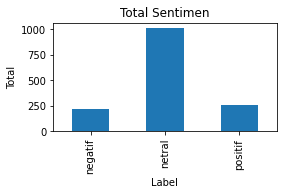

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
df['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Total Sentimen')
plt.xlabel('Label')
plt.ylabel('Total')

print("Total data: "+str(len(df)))
print("Data sentiment negatif: "+str(len(df.loc[df['label'] == 'negatif'])))
print("Data sentiment positif: "+str(len(df.loc[df['label'] == 'positif'])))
print("Data sentiment netral: "+str(len(df.loc[df['label'] == 'netral'])))

### Feature Engineering & Modelling

## 1.2 Data Split

In [ ]:
def split_data(X, y, test_size, validation_data=False):
 
    # Split data menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=0)
    
    if validation_data: # If true: dilakukan split data test menjadi test dan validation
        # Split data menjadi test dan validation (Tidak wajib dilakukan)
        X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=test_size, random_state=0)
        return X_train, X_test, X_val, y_train, y_test, y_val
 
    return X_train, X_test, y_train, y_test

## 1.3 Feature Extraction

In [ ]:
def combine_text(text):
    '''
    Fungsi untuk mengembalikan kata yang tertokenize (list kata) menjadi kalimat
    '''
    return ' '.join(text)
 
def vectorize(X_train, X_test, method='tfidf', ngram=(1, 1), from_tokenize=False):
    """
    Mengubah kata menjadi vector dengan Tfidf
    """
    
    if from_tokenize: # Jika input data berasal dari tokenize (list kata) harus dikembalikan menjadi kalimat
        X_train = X_train.apply(lambda x: ' '.join(x)) # Mengembalikan token X_train menjadi kalimat
        X_test = X_test.apply(lambda x: ' '.join(x)) # Mengembalikan token X_test menjadi kalimat
        
    if method == 'tfidf':
      vectorizer = TfidfVectorizer(ngram_range=ngram)

    elif method == 'count':
      vectorizer = CountVectorizer(ngram_range=ngram)

    X_train = vectorizer.fit_transform(X_train) # overwrite kalimat pada X_train menjadi vektor 
    X_test = vectorizer.transform(X_test)# mengubah kalimat pada X_test menjadi vektor (tidak dilakukan fit_transform pada X_test agar terhindar dari data leakage)
    
    train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names()) # mengembalikan ke dataframe
 
    return X_train, X_test

In [ ]:
def predicting(X_train, X_test, y_train):
  rf = OneVsRestClassifier(RandomForestClassifier(random_state=123))
  rf.fit(X_train, y_train)
  prediction = rf.predict(X_test) # Prediksi dengan output class
  prediction_prob = rf.predict_proba(X_test) # Prediksi dengan output probabilitas (bukan class) ==> Nantinya digunakan untuk scoring ROC-AUC

  return prediction, prediction_prob, rf

## 1.4 Klasifikasi Sentimen

In [ ]:
def main_prediction(X, y, test_size, validation_data=False, method='tfidf', ngram=(1,1), from_tokenize=False, cv=5):
  # Split data
  X_train, X_test, y_train, y_test = split_data(X, y, test_size=test_size)

  print(f'''
  Data distribution:
  - X_train: {X_train.shape[0]}
  - X_test: {X_test.shape[0]}
  ''')
  # Vectorize
  X_train_1, X_test_1 = vectorize(X_train, X_test, method=method, from_tokenize=from_tokenize, ngram=ngram)

  # Cross Validation
  model = OneVsRestClassifier(RandomForestClassifier(random_state=123))
  my_score = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)
  print('Cross validating ...')
  cv_scores_r2 = cross_val_score(model, X_train_1, y_train, cv=cv)
  cv_scores_roc_auc = cross_validate(model, X_train_1, y_train, cv=cv, scoring = my_score)
  cv_scores_roc_auc = cv_scores_roc_auc['test_score']
  print('Finished ...')

  # Predicting
  prediction, prediction_proba, model = predicting(X_train_1, X_test_1, y_train)

  # Akurasi == R2 (R-Squared)
  akurasi = accuracy_score(prediction, y_test) # Membandingkan hasil prediksi dengan kunci jawaban (y_test)
  print(f'Accuracy score (R2): {akurasi.round(2)}')

  rocauc_score = roc_auc_score(y_test, prediction_proba[:, :], multi_class='ovr')
  print(f'ROC AUC score = {rocauc_score.round(3)}\n')

  return akurasi, rocauc_score, prediction, prediction_proba, y_test, cv_scores_r2, cv_scores_roc_auc

## 1.5 Analisis Kinerja Sistem

### Test 45%

In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.45,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)

=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.789

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.669

=== tfidf & (3, 3) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.671

=== tfidf & (1, 2) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.799

=== tfidf & (1, 3) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.795

=== tfidf & (2, 3) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.651

=== count & (1, 1) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.75
ROC AUC score = 0.789

=== count & (2, 2) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.663

=== count & (3, 3) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.671

=== count & (1, 2) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.78

=== count & (1, 3) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.772

=== count & (2, 3) ===

  Data distribution:
  - X_train: 825
  - X_test: 675
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.65



In [ ]:
cv = []
for _ in range(int(data.shape[0]/5)):
  for i in range(1, 6):
    cv.append(i)
data['cv'] = cv
# data.to_excel('cross_val_summary.xlsx')

In [ ]:
data.sort_values(['Cross Validation (R2)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
2,0.763636,0.729521,count,"(1, 1)",0.745185,0.788558,3
1,0.751515,0.684756,tfidf,"(2, 3)",0.722963,0.651377,2
1,0.751515,0.696909,count,"(2, 3)",0.722963,0.649963,2
1,0.751515,0.704777,tfidf,"(2, 2)",0.722963,0.669284,2
1,0.751515,0.661433,count,"(3, 3)",0.724444,0.670753,2
1,0.751515,0.651535,tfidf,"(3, 3)",0.724444,0.670649,2
1,0.745455,0.768207,count,"(1, 3)",0.722963,0.772345,2
1,0.745455,0.710443,count,"(2, 2)",0.722963,0.663477,2
1,0.745455,0.767259,tfidf,"(1, 3)",0.727407,0.795141,2
1,0.739394,0.776847,count,"(1, 1)",0.745185,0.788558,2


In [ ]:
data.sort_values(['Cross Validation (ROC AUC)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
1,0.733333,0.791378,tfidf,"(1, 2)",0.733333,0.799260,2
1,0.739394,0.776847,count,"(1, 1)",0.745185,0.788558,2
1,0.745455,0.768207,count,"(1, 3)",0.722963,0.772345,2
1,0.739394,0.767566,count,"(1, 2)",0.728889,0.779594,2
0,0.709091,0.767331,tfidf,"(1, 3)",0.727407,0.795141,1
1,0.745455,0.767259,tfidf,"(1, 3)",0.727407,0.795141,2
1,0.739394,0.762797,tfidf,"(1, 1)",0.739259,0.788796,2
0,0.709091,0.752476,tfidf,"(1, 2)",0.733333,0.799260,1
0,0.715152,0.751133,tfidf,"(1, 1)",0.739259,0.788796,1
4,0.733333,0.743791,count,"(1, 1)",0.745185,0.788558,5


In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.703030,0.723794,count,"(1, 1)",0.745185,0.788558,1
4,0.733333,0.743791,count,"(1, 1)",0.745185,0.788558,5
3,0.696970,0.708279,count,"(1, 1)",0.745185,0.788558,4
2,0.763636,0.729521,count,"(1, 1)",0.745185,0.788558,3
1,0.739394,0.776847,count,"(1, 1)",0.745185,0.788558,2
1,0.739394,0.762797,tfidf,"(1, 1)",0.739259,0.788796,2
0,0.715152,0.751133,tfidf,"(1, 1)",0.739259,0.788796,1
3,0.696970,0.702819,tfidf,"(1, 1)",0.739259,0.788796,4
4,0.715152,0.727188,tfidf,"(1, 1)",0.739259,0.788796,5
2,0.715152,0.724500,tfidf,"(1, 1)",0.739259,0.788796,3


In [ ]:
data.sort_values(['ROC AUC'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
3,0.703030,0.699430,tfidf,"(1, 2)",0.733333,0.799260,4
2,0.721212,0.740211,tfidf,"(1, 2)",0.733333,0.799260,3
1,0.733333,0.791378,tfidf,"(1, 2)",0.733333,0.799260,2
0,0.709091,0.752476,tfidf,"(1, 2)",0.733333,0.799260,1
4,0.727273,0.703186,tfidf,"(1, 2)",0.733333,0.799260,5
4,0.721212,0.711192,tfidf,"(1, 3)",0.727407,0.795141,5
0,0.709091,0.767331,tfidf,"(1, 3)",0.727407,0.795141,1
1,0.745455,0.767259,tfidf,"(1, 3)",0.727407,0.795141,2
2,0.721212,0.717934,tfidf,"(1, 3)",0.727407,0.795141,3
3,0.703030,0.715860,tfidf,"(1, 3)",0.727407,0.795141,4


### Test 40%

In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.4,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)

=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.794

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.671

=== tfidf & (3, 3) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.674

=== tfidf & (1, 2) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.792

=== tfidf & (1, 3) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.8

=== tfidf & (2, 3) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.667

=== count & (1, 1) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.786

=== count & (2, 2) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.66

=== count & (3, 3) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.674

=== count & (1, 2) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.769

=== count & (1, 3) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.768

=== count & (2, 3) ===

  Data distribution:
  - X_train: 900
  - X_test: 600
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.667



In [ ]:
cv = []
for _ in range(int(data.shape[0]/5)):
  for i in range(1, 6):
    cv.append(i)
data['cv'] = cv
# data.to_excel('cross_val_summary.xlsx')

In [ ]:
data.sort_values(['Cross Validation (R2)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
2,0.750000,0.775060,count,"(1, 1)",0.745000,0.785807,3
1,0.744444,0.790320,count,"(1, 1)",0.745000,0.785807,2
2,0.738889,0.755456,count,"(1, 3)",0.726667,0.767697,3
2,0.738889,0.712770,tfidf,"(2, 3)",0.723333,0.666525,3
2,0.738889,0.703187,count,"(2, 2)",0.721667,0.659531,3
2,0.738889,0.790382,tfidf,"(1, 3)",0.733333,0.800404,3
2,0.738889,0.778306,tfidf,"(1, 2)",0.740000,0.791800,3
0,0.738889,0.785487,count,"(1, 1)",0.745000,0.785807,1
2,0.738889,0.692015,tfidf,"(2, 2)",0.725000,0.671448,3
2,0.738889,0.693161,count,"(2, 3)",0.723333,0.667055,3


In [ ]:
data.sort_values(['Cross Validation (ROC AUC)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
1,0.727778,0.802564,tfidf,"(1, 3)",0.733333,0.800404,2
1,0.722222,0.796639,count,"(1, 3)",0.726667,0.767697,2
2,0.738889,0.790382,tfidf,"(1, 3)",0.733333,0.800404,3
1,0.744444,0.790320,count,"(1, 1)",0.745000,0.785807,2
1,0.722222,0.786735,tfidf,"(1, 2)",0.740000,0.791800,2
0,0.738889,0.785487,count,"(1, 1)",0.745000,0.785807,1
1,0.722222,0.782754,count,"(1, 2)",0.736667,0.768755,2
2,0.738889,0.778306,tfidf,"(1, 2)",0.740000,0.791800,3
2,0.750000,0.775060,count,"(1, 1)",0.745000,0.785807,3
0,0.722222,0.773771,tfidf,"(1, 2)",0.740000,0.791800,1


In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.738889,0.785487,count,"(1, 1)",0.745000,0.785807,1
4,0.733333,0.757453,count,"(1, 1)",0.745000,0.785807,5
3,0.705556,0.669508,count,"(1, 1)",0.745000,0.785807,4
2,0.750000,0.775060,count,"(1, 1)",0.745000,0.785807,3
1,0.744444,0.790320,count,"(1, 1)",0.745000,0.785807,2
1,0.722222,0.759229,tfidf,"(1, 1)",0.743333,0.793563,2
0,0.722222,0.768545,tfidf,"(1, 1)",0.743333,0.793563,1
3,0.700000,0.648922,tfidf,"(1, 1)",0.743333,0.793563,4
4,0.727778,0.726143,tfidf,"(1, 1)",0.743333,0.793563,5
2,0.733333,0.757248,tfidf,"(1, 1)",0.743333,0.793563,3


In [ ]:
data.sort_values(['ROC AUC'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
4,0.722222,0.712372,tfidf,"(1, 3)",0.733333,0.800404,5
0,0.722222,0.771759,tfidf,"(1, 3)",0.733333,0.800404,1
1,0.727778,0.802564,tfidf,"(1, 3)",0.733333,0.800404,2
2,0.738889,0.790382,tfidf,"(1, 3)",0.733333,0.800404,3
3,0.700000,0.696517,tfidf,"(1, 3)",0.733333,0.800404,4
0,0.722222,0.768545,tfidf,"(1, 1)",0.743333,0.793563,1
1,0.722222,0.759229,tfidf,"(1, 1)",0.743333,0.793563,2
4,0.727778,0.726143,tfidf,"(1, 1)",0.743333,0.793563,5
3,0.700000,0.648922,tfidf,"(1, 1)",0.743333,0.793563,4
2,0.733333,0.757248,tfidf,"(1, 1)",0.743333,0.793563,3


###Test 35%


In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.35,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)


=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.76
ROC AUC score = 0.774

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.679

=== tfidf & (3, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.687

=== tfidf & (1, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.796

=== tfidf & (1, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.803

=== tfidf & (2, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.663

=== count & (1, 1) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.774

=== count & (2, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.666

=== count & (3, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.682

=== count & (1, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.766

=== count & (1, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.765

=== count & (2, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.661



In [ ]:
X_train

540                                    [era, new, normal]
205     [pemerintah, bikin, kebijakan, psbb, transisi,...
328     [nyetir, mobil, manual, habis, psbb, jigaa, bg...
486                      [deh, kayaknya, penerapan, psbb]
825     [new, post, era, new, normal, denty, ajak, pem...
                              ...                        
763     [korang, nak, manga, title, new, normal, and, ...
835     [dites, perjalanan, pulang, new, normal, activ...
1216    [sepuluh, juta, dosis, bahan, baku, vaksin, in...
559     [cm, memberikan, hampers, isinya, new, normal,...
684     [himbauan, new, normal, life, polsek, sekayam,...
Name: tweet_cleaned, Length: 975, dtype: object

In [ ]:
X_test

471     [baca, buku, jalan, keliling, kota, psbb, me, ...
9          [kalau, psbb, tidak, nasib, rakyat, indonesia]
1499    [nah, loh, perkara, tim, offline, online, tolo...
54      [kamu, paham, bedanya, izin, usaha, izin, oper...
1411    [hui, laju, kunun, kesihatan, sekali, vaksin, ...
                              ...                        
1319                  [kesimpulan, terbaik, anti, vaksin]
64                                                 [psbb]
1030                               [tidak, pakai, vaksin]
1423    [sudah, vaksin, disuruh, nunggu, menit, takut,...
416     [ayo, kirim, paket, mager, banget, nyantai, di...
Name: tweet_cleaned, Length: 525, dtype: object

In [ ]:
cv = []
for _ in range(int(data.shape[0]/5)):
  for i in range(1, 6):
    cv.append(i)
data['cv'] = cv
# data.to_excel('cross_val_summary.xlsx')

In [ ]:
data.sort_values(['Cross Validation (R2)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.758974,0.834533,count,"(1, 1)",0.735238,0.773958,1
2,0.743590,0.685652,tfidf,"(3, 3)",0.725714,0.687373,3
2,0.743590,0.789480,count,"(1, 1)",0.735238,0.773958,3
2,0.743590,0.683204,tfidf,"(2, 3)",0.721905,0.663093,3
2,0.743590,0.801665,tfidf,"(1, 3)",0.739048,0.803027,3
2,0.743590,0.685970,tfidf,"(2, 2)",0.721905,0.678937,3
2,0.738462,0.790575,count,"(1, 3)",0.723810,0.765304,3
0,0.738462,0.808764,count,"(1, 2)",0.727619,0.766458,1
2,0.738462,0.783258,tfidf,"(1, 2)",0.742857,0.796214,3
0,0.738462,0.810829,tfidf,"(1, 2)",0.742857,0.796214,1


In [ ]:
data.sort_values(['Cross Validation (ROC AUC)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.758974,0.834533,count,"(1, 1)",0.735238,0.773958,1
0,0.738462,0.810829,tfidf,"(1, 2)",0.742857,0.796214,1
0,0.738462,0.808764,count,"(1, 2)",0.727619,0.766458,1
0,0.733333,0.805783,count,"(1, 3)",0.723810,0.765304,1
2,0.743590,0.801665,tfidf,"(1, 3)",0.739048,0.803027,3
0,0.733333,0.801095,tfidf,"(1, 3)",0.739048,0.803027,1
0,0.738462,0.795440,tfidf,"(1, 1)",0.756190,0.773750,1
2,0.738462,0.790575,count,"(1, 3)",0.723810,0.765304,3
2,0.743590,0.789480,count,"(1, 1)",0.735238,0.773958,3
2,0.728205,0.783604,count,"(1, 2)",0.727619,0.766458,3


In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.738462,0.795440,tfidf,"(1, 1)",0.756190,0.773750,1
3,0.717949,0.707990,tfidf,"(1, 1)",0.756190,0.773750,4
4,0.712821,0.719024,tfidf,"(1, 1)",0.756190,0.773750,5
1,0.707692,0.748993,tfidf,"(1, 1)",0.756190,0.773750,2
2,0.738462,0.766306,tfidf,"(1, 1)",0.756190,0.773750,3
4,0.717949,0.715278,tfidf,"(1, 2)",0.742857,0.796214,5
0,0.738462,0.810829,tfidf,"(1, 2)",0.742857,0.796214,1
1,0.697436,0.728328,tfidf,"(1, 2)",0.742857,0.796214,2
2,0.738462,0.783258,tfidf,"(1, 2)",0.742857,0.796214,3
3,0.717949,0.710835,tfidf,"(1, 2)",0.742857,0.796214,4


In [ ]:
data.sort_values(['ROC AUC'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
4,0.717949,0.699763,tfidf,"(1, 3)",0.739048,0.803027,5
3,0.717949,0.711889,tfidf,"(1, 3)",0.739048,0.803027,4
2,0.743590,0.801665,tfidf,"(1, 3)",0.739048,0.803027,3
1,0.697436,0.723276,tfidf,"(1, 3)",0.739048,0.803027,2
0,0.733333,0.801095,tfidf,"(1, 3)",0.739048,0.803027,1
1,0.697436,0.728328,tfidf,"(1, 2)",0.742857,0.796214,2
4,0.717949,0.715278,tfidf,"(1, 2)",0.742857,0.796214,5
3,0.717949,0.710835,tfidf,"(1, 2)",0.742857,0.796214,4
2,0.738462,0.783258,tfidf,"(1, 2)",0.742857,0.796214,3
0,0.738462,0.810829,tfidf,"(1, 2)",0.742857,0.796214,1


###Test 30%


In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.3,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)


=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.75
ROC AUC score = 0.791

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.707

=== tfidf & (3, 3) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.694

=== tfidf & (1, 2) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.815

=== tfidf & (1, 3) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.808

=== tfidf & (2, 3) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.699

=== count & (1, 1) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.75
ROC AUC score = 0.794

=== count & (2, 2) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.71
ROC AUC score = 0.7

=== count & (3, 3) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.693

=== count & (1, 2) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.78

=== count & (1, 3) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.775

=== count & (2, 3) ===

  Data distribution:
  - X_train: 1050
  - X_test: 450
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.71
ROC AUC score = 0.69



In [ ]:
cv = []
for _ in range(int(data.shape[0]/5)):
  for i in range(1, 6):
    cv.append(i)
data['cv'] = cv
# data.to_excel('cross_val_summary.xlsx')

In [ ]:
data.sort_values(['Cross Validation (R2)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.742857,0.776024,tfidf,"(1, 1)",0.748889,0.790766,1
2,0.738095,0.706102,tfidf,"(2, 2)",0.720000,0.706527,3
2,0.738095,0.666601,tfidf,"(2, 3)",0.722222,0.698504,3
2,0.738095,0.665202,tfidf,"(3, 3)",0.715556,0.694495,3
0,0.738095,0.795087,count,"(1, 1)",0.746667,0.793613,1
2,0.738095,0.747727,tfidf,"(1, 1)",0.748889,0.790766,3
0,0.733333,0.761111,tfidf,"(1, 2)",0.740000,0.814831,1
2,0.733333,0.783395,tfidf,"(1, 3)",0.733333,0.807596,3
2,0.733333,0.781052,tfidf,"(1, 2)",0.740000,0.814831,3
2,0.733333,0.762279,count,"(1, 1)",0.746667,0.793613,3


In [ ]:
data.sort_values(['Cross Validation (ROC AUC)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.738095,0.795087,count,"(1, 1)",0.746667,0.793613,1
1,0.719048,0.787346,tfidf,"(1, 2)",0.740000,0.814831,2
0,0.728571,0.784358,tfidf,"(1, 3)",0.733333,0.807596,1
2,0.733333,0.783395,tfidf,"(1, 3)",0.733333,0.807596,3
1,0.714286,0.782560,tfidf,"(1, 3)",0.733333,0.807596,2
2,0.728571,0.781444,count,"(1, 2)",0.731111,0.780420,3
2,0.733333,0.781052,tfidf,"(1, 2)",0.740000,0.814831,3
0,0.742857,0.776024,tfidf,"(1, 1)",0.748889,0.790766,1
0,0.723810,0.774147,count,"(1, 3)",0.717778,0.774687,1
1,0.714286,0.768767,tfidf,"(1, 1)",0.748889,0.790766,2


In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.742857,0.776024,tfidf,"(1, 1)",0.748889,0.790766,1
1,0.714286,0.768767,tfidf,"(1, 1)",0.748889,0.790766,2
2,0.738095,0.747727,tfidf,"(1, 1)",0.748889,0.790766,3
3,0.714286,0.698062,tfidf,"(1, 1)",0.748889,0.790766,4
4,0.704762,0.723378,tfidf,"(1, 1)",0.748889,0.790766,5
4,0.719048,0.749430,count,"(1, 1)",0.746667,0.793613,5
3,0.719048,0.691880,count,"(1, 1)",0.746667,0.793613,4
2,0.733333,0.762279,count,"(1, 1)",0.746667,0.793613,3
1,0.723810,0.760275,count,"(1, 1)",0.746667,0.793613,2
0,0.738095,0.795087,count,"(1, 1)",0.746667,0.793613,1


In [ ]:
data.sort_values(['ROC AUC'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
1,0.719048,0.787346,tfidf,"(1, 2)",0.740000,0.814831,2
4,0.719048,0.714914,tfidf,"(1, 2)",0.740000,0.814831,5
3,0.719048,0.694467,tfidf,"(1, 2)",0.740000,0.814831,4
2,0.733333,0.781052,tfidf,"(1, 2)",0.740000,0.814831,3
0,0.733333,0.761111,tfidf,"(1, 2)",0.740000,0.814831,1
4,0.719048,0.705300,tfidf,"(1, 3)",0.733333,0.807596,5
3,0.719048,0.730390,tfidf,"(1, 3)",0.733333,0.807596,4
2,0.733333,0.783395,tfidf,"(1, 3)",0.733333,0.807596,3
1,0.714286,0.782560,tfidf,"(1, 3)",0.733333,0.807596,2
0,0.728571,0.784358,tfidf,"(1, 3)",0.733333,0.807596,1


###Test 25%


In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.25,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)


=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.795

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.7
ROC AUC score = 0.706

=== tfidf & (3, 3) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.7
ROC AUC score = 0.68

=== tfidf & (1, 2) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.795

=== tfidf & (1, 3) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.809

=== tfidf & (2, 3) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.7
ROC AUC score = 0.692

=== count & (1, 1) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.795

=== count & (2, 2) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.7
ROC AUC score = 0.689

=== count & (3, 3) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.69
ROC AUC score = 0.685

=== count & (1, 2) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.71
ROC AUC score = 0.776

=== count & (1, 3) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.7
ROC AUC score = 0.764

=== count & (2, 3) ===

  Data distribution:
  - X_train: 1125
  - X_test: 375
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.69
ROC AUC score = 0.677



In [ ]:
cv = []
for _ in range(int(data.shape[0]/5)):
  for i in range(1, 6):
    cv.append(i)
data['cv'] = cv
# data.to_excel('cross_val_summary.xlsx')

In [ ]:
data.sort_values(['Cross Validation (R2)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
1,0.746667,0.785175,count,"(1, 1)",0.720000,0.795316,2
0,0.742222,0.796819,count,"(1, 1)",0.720000,0.795316,1
2,0.737778,0.698271,tfidf,"(2, 2)",0.704000,0.706281,3
3,0.737778,0.730408,count,"(1, 1)",0.720000,0.795316,4
2,0.737778,0.699632,tfidf,"(2, 3)",0.698667,0.691947,3
0,0.737778,0.767107,tfidf,"(1, 2)",0.725333,0.794810,1
2,0.737778,0.672230,tfidf,"(3, 3)",0.701333,0.680482,3
0,0.737778,0.770206,tfidf,"(1, 1)",0.730667,0.795413,1
2,0.737778,0.768774,tfidf,"(1, 1)",0.730667,0.795413,3
3,0.737778,0.718784,tfidf,"(1, 1)",0.730667,0.795413,4


In [ ]:
data.sort_values(['Cross Validation (ROC AUC)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.742222,0.796819,count,"(1, 1)",0.720000,0.795316,1
1,0.746667,0.785175,count,"(1, 1)",0.720000,0.795316,2
1,0.728889,0.784053,tfidf,"(1, 1)",0.730667,0.795413,2
1,0.733333,0.783230,tfidf,"(1, 2)",0.725333,0.794810,2
0,0.733333,0.781364,tfidf,"(1, 3)",0.722667,0.808993,1
2,0.728889,0.780329,count,"(1, 1)",0.720000,0.795316,3
1,0.728889,0.777562,tfidf,"(1, 3)",0.722667,0.808993,2
2,0.733333,0.775516,tfidf,"(1, 2)",0.725333,0.794810,3
2,0.733333,0.774851,tfidf,"(1, 3)",0.722667,0.808993,3
2,0.733333,0.774088,count,"(1, 3)",0.701333,0.764371,3


In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.737778,0.770206,tfidf,"(1, 1)",0.730667,0.795413,1
3,0.737778,0.718784,tfidf,"(1, 1)",0.730667,0.795413,4
4,0.711111,0.735802,tfidf,"(1, 1)",0.730667,0.795413,5
1,0.728889,0.784053,tfidf,"(1, 1)",0.730667,0.795413,2
2,0.737778,0.768774,tfidf,"(1, 1)",0.730667,0.795413,3
4,0.724444,0.719767,tfidf,"(1, 2)",0.725333,0.794810,5
0,0.737778,0.767107,tfidf,"(1, 2)",0.725333,0.794810,1
1,0.733333,0.783230,tfidf,"(1, 2)",0.725333,0.794810,2
2,0.733333,0.775516,tfidf,"(1, 2)",0.725333,0.794810,3
3,0.728889,0.728109,tfidf,"(1, 2)",0.725333,0.794810,4


In [ ]:
data.sort_values(['ROC AUC'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.733333,0.781364,tfidf,"(1, 3)",0.722667,0.808993,1
4,0.720000,0.715204,tfidf,"(1, 3)",0.722667,0.808993,5
3,0.733333,0.725082,tfidf,"(1, 3)",0.722667,0.808993,4
2,0.733333,0.774851,tfidf,"(1, 3)",0.722667,0.808993,3
1,0.728889,0.777562,tfidf,"(1, 3)",0.722667,0.808993,2
0,0.737778,0.770206,tfidf,"(1, 1)",0.730667,0.795413,1
2,0.737778,0.768774,tfidf,"(1, 1)",0.730667,0.795413,3
3,0.737778,0.718784,tfidf,"(1, 1)",0.730667,0.795413,4
4,0.711111,0.735802,tfidf,"(1, 1)",0.730667,0.795413,5
1,0.728889,0.784053,tfidf,"(1, 1)",0.730667,0.795413,2


###Test 20%


In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.20,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)


=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.807

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.708

=== tfidf & (3, 3) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.71
ROC AUC score = 0.68

=== tfidf & (1, 2) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.817

=== tfidf & (1, 3) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.806

=== tfidf & (2, 3) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.71
ROC AUC score = 0.7

=== count & (1, 1) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.805

=== count & (2, 2) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.71
ROC AUC score = 0.692

=== count & (3, 3) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.7
ROC AUC score = 0.677

=== count & (1, 2) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.792

=== count & (1, 3) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.765

=== count & (2, 3) ===

  Data distribution:
  - X_train: 1200
  - X_test: 300
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.7
ROC AUC score = 0.69



In [ ]:
cv = []
for _ in range(int(data.shape[0]/5)):
  for i in range(1, 6):
    cv.append(i)
data['cv'] = cv
# data.to_excel('cross_val_summary.xlsx')

In [ ]:
data.sort_values(['Cross Validation (R2)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
2,0.754167,0.800582,count,"(1, 1)",0.730000,0.804755,3
0,0.745833,0.775334,count,"(1, 1)",0.730000,0.804755,1
1,0.745833,0.776538,tfidf,"(1, 1)",0.733333,0.806778,2
1,0.741667,0.774823,count,"(1, 2)",0.726667,0.791581,2
3,0.741667,0.734612,count,"(1, 1)",0.730000,0.804755,4
1,0.741667,0.784105,count,"(1, 1)",0.730000,0.804755,2
0,0.741667,0.757828,tfidf,"(1, 1)",0.733333,0.806778,1
2,0.737500,0.775795,tfidf,"(1, 1)",0.733333,0.806778,3
2,0.737500,0.652311,tfidf,"(3, 3)",0.713333,0.680046,3
2,0.737500,0.656321,tfidf,"(2, 3)",0.713333,0.699754,3


In [ ]:
data.sort_values(['Cross Validation (ROC AUC)'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
2,0.754167,0.800582,count,"(1, 1)",0.730000,0.804755,3
2,0.733333,0.795646,count,"(1, 2)",0.726667,0.791581,3
1,0.729167,0.788115,count,"(1, 3)",0.716667,0.765018,2
2,0.729167,0.784791,tfidf,"(1, 3)",0.723333,0.806448,3
1,0.741667,0.784105,count,"(1, 1)",0.730000,0.804755,2
2,0.733333,0.783339,tfidf,"(1, 2)",0.733333,0.817442,3
1,0.745833,0.776538,tfidf,"(1, 1)",0.733333,0.806778,2
2,0.737500,0.775795,tfidf,"(1, 1)",0.733333,0.806778,3
0,0.745833,0.775334,count,"(1, 1)",0.730000,0.804755,1
1,0.741667,0.774823,count,"(1, 2)",0.726667,0.791581,2


In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
0,0.741667,0.757828,tfidf,"(1, 1)",0.733333,0.806778,1
0,0.729167,0.757313,tfidf,"(1, 2)",0.733333,0.817442,1
2,0.737500,0.775795,tfidf,"(1, 1)",0.733333,0.806778,3
3,0.733333,0.742922,tfidf,"(1, 1)",0.733333,0.806778,4
4,0.716667,0.732497,tfidf,"(1, 1)",0.733333,0.806778,5
1,0.745833,0.776538,tfidf,"(1, 1)",0.733333,0.806778,2
4,0.720833,0.734364,tfidf,"(1, 2)",0.733333,0.817442,5
3,0.725000,0.727446,tfidf,"(1, 2)",0.733333,0.817442,4
2,0.733333,0.783339,tfidf,"(1, 2)",0.733333,0.817442,3
1,0.729167,0.770311,tfidf,"(1, 2)",0.733333,0.817442,2


In [ ]:
data.sort_values(['ROC AUC'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC,cv
3,0.725000,0.727446,tfidf,"(1, 2)",0.733333,0.817442,4
4,0.720833,0.734364,tfidf,"(1, 2)",0.733333,0.817442,5
2,0.733333,0.783339,tfidf,"(1, 2)",0.733333,0.817442,3
1,0.729167,0.770311,tfidf,"(1, 2)",0.733333,0.817442,2
0,0.729167,0.757313,tfidf,"(1, 2)",0.733333,0.817442,1
0,0.741667,0.757828,tfidf,"(1, 1)",0.733333,0.806778,1
4,0.716667,0.732497,tfidf,"(1, 1)",0.733333,0.806778,5
3,0.733333,0.742922,tfidf,"(1, 1)",0.733333,0.806778,4
2,0.737500,0.775795,tfidf,"(1, 1)",0.733333,0.806778,3
1,0.745833,0.776538,tfidf,"(1, 1)",0.733333,0.806778,2


###Test 15%


In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.15,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)


=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 1275
  - X_test: 225
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.7
ROC AUC score = 0.801

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 1275
  - X_test: 225
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


KeyboardInterrupt: ignored

In [ ]:
cv = []
for _ in range(int(data.shape[0]/5)):
  for i in range(1, 6):
    cv.append(i)
data['cv'] = cv
# data.to_excel('cross_val_summary.xlsx')

In [ ]:
data.sort_values(['Cross Validation (R2)'], ascending=False).head(10)

In [ ]:
data.sort_values(['Cross Validation (ROC AUC)'], ascending=False).head(10)

In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

In [ ]:
data.sort_values(['ROC AUC'], ascending=False).head(10)

###Test 10%


In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.10,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)


In [ ]:
cv = []
for _ in range(int(data.shape[0]/5)):
  for i in range(1, 6):
    cv.append(i)
data['cv'] = cv
# data.to_excel('cross_val_summary.xlsx')

In [ ]:
data.sort_values(['Cross Validation (R2)'], ascending=False).head(10)

In [ ]:
data.sort_values(['Cross Validation (ROC AUC)'], ascending=False).head(10)

In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

In [ ]:
data.sort_values(['ROC AUC'], ascending=False).head(10)

### Evaluasi

In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.35)
X_train_1, X_test_1 = vectorize(X_train, X_test, from_tokenize=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model = OneVsRestClassifier(RandomForestClassifier(random_state=123))
my_score = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)
print('Cross validating ...')

cv_scores_roc_auc = cross_validate(model, X_train_1, y_train, cv=3, scoring = my_score)
print('Finished ...')

Cross validating ...
Finished ...


test_score adalah 3 nilai terbaik

In [ ]:
cv_scores_roc_auc['test_score']

array([0.75365526, 0.75309684, 0.74262031])

In [ ]:
accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.35,
                                                                                   method='tfidf', 
                                                                                   ngram=(1, 1), 
                                                                                   from_tokenize=True)


  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.76
ROC AUC score = 0.774



In [ ]:
# Akurasi == R2 (R-Squared)
akurasi = accuracy_score(prediction, y_test) # Membandingkan hasil prediksi dengan kunci jawaban (y_test)
print(f'Akurasi (R2) prediksi model Random Forest: {akurasi.round(2)}')

Akurasi (R2) prediksi model Random Forest: 0.76


In [ ]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

     negatif       0.08      0.55      0.14        11
      netral       0.99      0.74      0.85       474
     positif       0.43      1.00      0.60        40

    accuracy                           0.76       525
   macro avg       0.50      0.76      0.53       525
weighted avg       0.92      0.76      0.81       525



Tingginya precision dan f1-score pada class netral disebabkan karena data netral jauh lebih besar daripada negatif dan positif. reference: https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

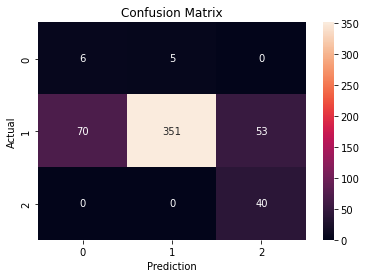

In [ ]:
cm = confusion_matrix(prediction, y_test)
sns.heatmap(cm, annot=True, fmt='d') # annot=True : memunculkan angka pada heatmap, fmt='d' : mengubah scientific notation menjadi digit saja
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

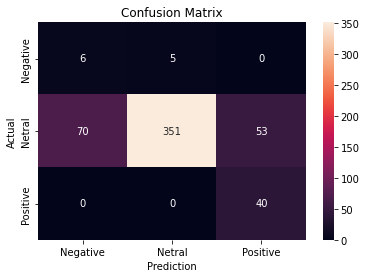

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Prediction');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative','Netral','Positive']); ax.yaxis.set_ticklabels(['Negative','Netral','Positive']);

In [ ]:
rocauc_score = roc_auc_score(y_test, prediction_proba[:, :], multi_class='ovr')
print(f'ROC AUC score = {rocauc_score.round(3)}')

In [ ]:
y_test_bin = label_binarize(y_test, classes=['negatif','netral','positif'])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['darkorange', 'blue', 'red']

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], prediction_proba[:, i])
  plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label= str(i))
  print('AUC for Class {}: {}'.format(i, auc(fpr[i], tpr[i]).round(3)))

print()
plt.plot([0, 1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc='lower right')
plt.show()

#### Cross Validation

Tahapan umum fungsi Cross Validation:
- shuffle data X dan y
- split data menjadi sejumlah K (cv)
- Mengambil salah satu dari grub K menjadi data test dan sisanya data training
- Fit model kemudian dievaluasi dengan R2/ accuracy_score
- Simpan hasil evaluasi dan reset kembali model 
- Kembali ke atas hingga berulang sejumlah CV 

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

In [ ]:
X = df['tweet_cleaned']
y = df["label"]

skf_scores = []
skf = StratifiedKFold(n_splits=5) # Melakukan 5 kali eksperimen split data dengan komposisi yang berbeda
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train, X_test = vectorize(X_train, X_test, from_tokenize=True)
    nb = RandomForestClassifier()
    nb.fit(X_train, y_train)
    prediction = nb.predict(X_test)

    skf_scores.append(accuracy_score(y_test, prediction))

# Mengubah menjadi list metrics numpy array
skf_scores = np.array(skf_scores)
print('Mean akurasi: ', np.mean(skf_scores, axis=0))
print('Standar deviasi akurasi: ', np.std(skf_scores, axis=0))

In [ ]:
# Perbandingan antara Cross Validation RF dengan StratifiedKFold
pd.DataFrame(zip(cv_scores, skf_scores), columns=['Cross Validation', 'StratifiedKFold'])

Cross validation dilakukan agar tidak terjadi overfitting dan melihat kemungkinan score tertinggi yang bisa diraih saat dilakukan split data. Semakin tinggi jumlah cv/ n_splits, semakin tinggi reliabilitasnya

In [ ]:
from sklearn.model_selection import GridSearchCV

# Mencari parameter RandomForest terbaik untuk modelling
rf = RandomForestClassifier()

# List parameter yang akan dilakukan random search 3*4
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

# Pencarian Parameter
cv = GridSearchCV(rf,parameters)
cv.fit(X_train,y_train)

In [ ]:
print(f"Best Score: {cv.best_score_.round(2)}")
print(f"Best Parameters: {cv.best_params_}")

**NOT FOR RUNNING**

---



###Test 35% with random split


In [ ]:
def split_data(X, y, test_size, validation_data=False):
 
    # Split data menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=1)
    
    if validation_data: # If true: dilakukan split data test menjadi test dan validation
        # Split data menjadi test dan validation (Tidak wajib dilakukan)
        X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=test_size, random_state=1)
        return X_train, X_test, X_val, y_train, y_test, y_val
 
    return X_train, X_test, y_train, y_test

In [ ]:
def combine_text(text):
    '''
    Fungsi untuk mengembalikan kata yang tertokenize (list kata) menjadi kalimat
    '''
    return ' '.join(text)
 
def vectorize(X_train, X_test, method='tfidf', ngram=(1, 1), from_tokenize=False):
    """
    Mengubah kata menjadi vector dengan Tfidf
    """
    
    if from_tokenize: # Jika input data berasal dari tokenize (list kata) harus dikembalikan menjadi kalimat
        X_train = X_train.apply(lambda x: ' '.join(x)) # Mengembalikan token X_train menjadi kalimat
        X_test = X_test.apply(lambda x: ' '.join(x)) # Mengembalikan token X_test menjadi kalimat
        
    if method == 'tfidf':
      vectorizer = TfidfVectorizer(ngram_range=ngram)

    elif method == 'count':
      vectorizer = CountVectorizer(ngram_range=ngram)

    X_train = vectorizer.fit_transform(X_train) # overwrite kalimat pada X_train menjadi vektor 
    X_test = vectorizer.transform(X_test)# mengubah kalimat pada X_test menjadi vektor (tidak dilakukan fit_transform pada X_test agar terhindar dari data leakage)
    
    train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names()) # mengembalikan ke dataframe
 
    return X_train, X_test

In [ ]:
def main_prediction(X, y, test_size, validation_data=False, method='tfidf', ngram=(1,1), from_tokenize=False, cv=5):
  # Split data
  X_train, X_test, y_train, y_test = split_data(X, y, test_size=test_size)

  print(f'''
  Data distribution:
  - X_train: {X_train.shape[0]}
  - X_test: {X_test.shape[0]}
  ''')
  # Vectorize
  X_train_1, X_test_1 = vectorize(X_train, X_test, method=method, from_tokenize=from_tokenize, ngram=ngram)

  # Cross Validation
  model = OneVsRestClassifier(RandomForestClassifier(random_state=123))
  my_score = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)
  print('Cross validating ...')
  cv_scores_r2 = cross_val_score(model, X_train_1, y_train, cv=cv)
  cv_scores_roc_auc = cross_validate(model, X_train_1, y_train, cv=cv, scoring = my_score)
  cv_scores_roc_auc = cv_scores_roc_auc['test_score']
  print('Finished ...')

  # Predicting
  prediction, prediction_proba, model = predicting(X_train_1, X_test_1, y_train)

  # Akurasi == R2 (R-Squared)
  akurasi = accuracy_score(prediction, y_test) # Membandingkan hasil prediksi dengan kunci jawaban (y_test)
  print(f'Accuracy score (R2): {akurasi.round(2)}')

  rocauc_score = roc_auc_score(y_test, prediction_proba[:, :], multi_class='ovr')
  print(f'ROC AUC score = {rocauc_score.round(3)}\n')

  return akurasi, rocauc_score, prediction, prediction_proba, y_test, cv_scores_r2, cv_scores_roc_auc

In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.35,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)


=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...
Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.775

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.666

=== tfidf & (3, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.687

=== tfidf & (1, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.791

=== tfidf & (1, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.788

=== tfidf & (2, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.672

=== count & (1, 1) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.75
ROC AUC score = 0.778

=== count & (2, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.667

=== count & (3, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.682

=== count & (1, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.767

=== count & (1, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.761

=== count & (2, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.669



In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC
0,0.733333,0.745700,count,"(1, 1)",0.752381,0.777716
4,0.707692,0.789069,count,"(1, 1)",0.752381,0.777716
3,0.728205,0.708955,count,"(1, 1)",0.752381,0.777716
2,0.728205,0.785173,count,"(1, 1)",0.752381,0.777716
1,0.702564,0.757685,count,"(1, 1)",0.752381,0.777716
1,0.707692,0.756766,tfidf,"(1, 1)",0.735238,0.774859
0,0.723077,0.771839,tfidf,"(1, 1)",0.735238,0.774859
3,0.728205,0.722833,tfidf,"(1, 1)",0.735238,0.774859
2,0.717949,0.750950,tfidf,"(1, 1)",0.735238,0.774859
4,0.728205,0.799051,tfidf,"(1, 1)",0.735238,0.774859


In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.35,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)


=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.775

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.666

=== tfidf & (3, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.687

=== tfidf & (1, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.791

=== tfidf & (1, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.788

=== tfidf & (2, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.672

=== count & (1, 1) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.75
ROC AUC score = 0.778

=== count & (2, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.667

=== count & (3, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.682

=== count & (1, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.767

=== count & (1, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.761

=== count & (2, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.669



In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC
0,0.733333,0.745700,count,"(1, 1)",0.752381,0.777716
4,0.707692,0.789069,count,"(1, 1)",0.752381,0.777716
3,0.728205,0.708955,count,"(1, 1)",0.752381,0.777716
2,0.728205,0.785173,count,"(1, 1)",0.752381,0.777716
1,0.702564,0.757685,count,"(1, 1)",0.752381,0.777716
1,0.707692,0.756766,tfidf,"(1, 1)",0.735238,0.774859
0,0.723077,0.771839,tfidf,"(1, 1)",0.735238,0.774859
3,0.728205,0.722833,tfidf,"(1, 1)",0.735238,0.774859
2,0.717949,0.750950,tfidf,"(1, 1)",0.735238,0.774859
4,0.728205,0.799051,tfidf,"(1, 1)",0.735238,0.774859


## example

In [ ]:
lst=[[['psbb,sampai,saja,biar,gila,saya,hadap,kerja,kantor'],'negatif'],
     [['dapat,wfh,wkwkwk,banget,saya,tahun,doang,pas,psbb'],'netral'],
     [['laku,psbb,ppkm,mikro,perintah,dukung,masyarakat,bijak,tangan,covid,minimal,angka,dorongpemulihannkri'],'positif'],
     [['upaya,perintah,tangan,pandemi,batas,mobilitas,psbb,ppkm,mikro,dorongpemulihannkri'],'positif'],
     [['tahun,cluster,dansa,besar,anies,canang,lockdown,psbb,tito,mendagri,amp,mahfud,tolak,rumah,sakit,boss,psbb,pusat,dalih,new,normal,makan,tuh,akibat,new,normal'],'negatif'],
     [['kalau,bayi,lahir,tahun,sesar,lahir,normal,new,normal'],'netral'],
     [['wisuda,new,normal,universitas,nurul,jadid,probolinggo,perhati,protokol,covid'],'positif'],
     [['vaksin,wajib,saja,malsuin,wkwkwkwk'],'negatif'],
     [['alhamdulillah,hari,saya,vaksin,smg,berkah,aamiin,rabb'],'positif'],
     [['besok,nemenin,suami,vaksin,inap,trus,mikir,makan,saja,jakarta,bogor,ramah,bawa,anak,qampung,diri'],'netral']]

In [ ]:
new_df = pd.DataFrame(lst, columns =['tweet', 'label'])
new_df

,tweet,label
0,"[psbb,sampai,saja,biar,gila,saya,hadap,kerja,k...",negatif
1,"[dapat,wfh,wkwkwk,banget,saya,tahun,doang,pas,...",netral
2,"[laku,psbb,ppkm,mikro,perintah,dukung,masyarak...",positif
3,"[upaya,perintah,tangan,pandemi,batas,mobilitas...",positif
4,"[tahun,cluster,dansa,besar,anies,canang,lockdo...",negatif
5,"[kalau,bayi,lahir,tahun,sesar,lahir,normal,new...",netral
6,"[wisuda,new,normal,universitas,nurul,jadid,pro...",positif
7,"[vaksin,wajib,saja,malsuin,wkwkwkwk]",negatif
8,"[alhamdulillah,hari,saya,vaksin,smg,berkah,aam...",positif
9,"[besok,nemenin,suami,vaksin,inap,trus,mikir,ma...",netral


In [ ]:
def main_prediction(X, y, test_size, validation_data=False, method='tfidf', ngram=(1,1), from_tokenize=False, cv=5):
  # Split data
  X_train, X_test, y_train, y_test = split_data(X, y, test_size=test_size)

  print(f'''
  Data distribution:
  - X_train: {X_train.shape[0]}
  - X_test: {X_test.shape[0]}
  ''')
  # Vectorize
  X_train_1, X_test_1,train_df = vectorize(X_train, X_test, method=method, from_tokenize=from_tokenize, ngram=ngram)

  # Cross Validation
  model = OneVsRestClassifier(RandomForestClassifier(random_state=0))
  my_score = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)
  print('Cross validating ...')
  cv_scores_r2 = cross_val_score(model, X_train_1, y_train, cv=cv)
  cv_scores_roc_auc = cross_validate(model, X_train_1, y_train, cv=cv, scoring = my_score)
  cv_scores_roc_auc = cv_scores_roc_auc['test_score']
  print('Finished ...')

  # Predicting
  prediction, prediction_proba, model = predicting(X_train_1, X_test_1, y_train)

  # Akurasi == R2 (R-Squared)
  akurasi = accuracy_score(prediction, y_test) # Membandingkan hasil prediksi dengan kunci jawaban (y_test)
  print(f'Accuracy score (R2): {akurasi.round(2)}')

  rocauc_score = roc_auc_score(y_test, prediction_proba[:, :], multi_class='ovr')
  print(f'ROC AUC score = {rocauc_score.round(3)}\n')

  return akurasi, rocauc_score, prediction, prediction_proba, y_test, cv_scores_r2, cv_scores_roc_auc

In [ ]:
new_X = new_df['tweet']
new_y = new_df['label']

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2)

In [ ]:
new_X_train

7                 [vaksin,wajib,saja,malsuin,wkwkwkwk]
8    [alhamdulillah,hari,saya,vaksin,smg,berkah,aam...
9    [besok,nemenin,suami,vaksin,inap,trus,mikir,ma...
6    [wisuda,new,normal,universitas,nurul,jadid,pro...
3    [upaya,perintah,tangan,pandemi,batas,mobilitas...
2    [laku,psbb,ppkm,mikro,perintah,dukung,masyarak...
1    [dapat,wfh,wkwkwk,banget,saya,tahun,doang,pas,...
0    [psbb,sampai,saja,biar,gila,saya,hadap,kerja,k...
Name: tweet, dtype: object

In [ ]:
new_X_test

4    [tahun,cluster,dansa,besar,anies,canang,lockdo...
5    [kalau,bayi,lahir,tahun,sesar,lahir,normal,new...
Name: tweet, dtype: object

In [ ]:
new_y_train

3    positif
4    negatif
2    positif
0    negatif
1     netral
5     netral
9     netral
8    positif
Name: label, dtype: object

In [ ]:
new_y_test

6    positif
7    negatif
Name: label, dtype: object

In [ ]:
def combine_text(text):
    '''
    Fungsi untuk mengembalikan kata yang tertokenize (list kata) menjadi kalimat
    '''
    return ' '.join(text)
 
def vectorize(X_train, X_test, method='tfidf', ngram=(1, 1), from_tokenize=False):
    """
    Mengubah kata menjadi vector dengan Tfidf
    """
    
    if from_tokenize: # Jika input data berasal dari tokenize (list kata) harus dikembalikan menjadi kalimat
        X_train = X_train.apply(lambda x: ' '.join(x)) # Mengembalikan token X_train menjadi kalimat
        X_test = X_test.apply(lambda x: ' '.join(x)) # Mengembalikan token X_test menjadi kalimat
        
    if method == 'tfidf':
      vectorizer = TfidfVectorizer(ngram_range=ngram)

    elif method == 'count':
      vectorizer = CountVectorizer(ngram_range=ngram)

    X_train = vectorizer.fit_transform(X_train) # overwrite kalimat pada X_train menjadi vektor 
    X_test = vectorizer.transform(X_test)# mengubah kalimat pada X_test menjadi vektor (tidak dilakukan fit_transform pada X_test agar terhindar dari data leakage)
    
    train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names()) # mengembalikan ke dataframe
 
    return X_train, X_test, train_df

In [ ]:
X_train_1, X_test_1, train_df = vectorize(X_train, X_test, method='tfidf', from_tokenize=True, ngram=(1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_df

,aamiin,akibat,alhamdulillah,amp,anak,angka,anies,banget,batas,bawa,...,tahun,tangan,tito,tolak,trus,tuh,upaya,vaksin,wfh,wkwkwk
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357442,0.000000,...,0.000000,0.299564,0.000000,0.000000,0.000000,0.000000,0.357442,0.000000,0.000000,0.000000
1,0.000000,0.195723,0.000000,0.195723,0.000000,0.000000,0.195723,0.000000,0.000000,0.000000,...,0.141546,0.000000,0.195723,0.195723,0.000000,0.195723,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.303912,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.254702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368579,0.000000,0.000000,...,0.266553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368579,0.368579
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.217706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.257282,0.000000,0.000000,0.000000,0.000000,0.257282,...,0.000000,0.000000,0.000000,0.000000,0.257282,0.000000,0.000000,0.215622,0.000000,0.000000
7,0.372023,0.000000,0.372023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.311784,0.000000,0.000000


In [ ]:
X_train_1, X_test_1, train_df = vectorize(X_train, X_test, method='count', from_tokenize=True, ngram=(1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_df

,aamiin,akibat,alhamdulillah,amp,anak,angka,anies,banget,batas,bawa,...,tahun,tangan,tito,tolak,trus,tuh,upaya,vaksin,wfh,wkwkwk
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,1,0,1,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


###Decision Tree Plot on Random Forest


In [ ]:
def split_data(X, y, test_size, validation_data=False):
 
    # Split data menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=1)
    
    if validation_data: # If true: dilakukan split data test menjadi test dan validation
        # Split data menjadi test dan validation (Tidak wajib dilakukan)
        X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=test_size, random_state=1)
        return X_train, X_test, X_val, y_train, y_test, y_val
 
    return X_train, X_test, y_train, y_test

In [ ]:
df

,tweet,label,tweet_cleaned,tweet_stemmed
0,b'@Nats28mj @tanyainrl psbb',netral,[psbb],[psbb]
1,b'@azzlrzky @Ridwanadityaaa Opo? PSBB?',netral,"[apa, psbb]","[apa, psbb]"
2,b'org2 bosen psbb ktnya.yg dr jkt ke lampung y...,negatif,"[bosen, psbb, katanya, dr, jakarta, lampung, d...","[bosen, psbb, kata, dr, jakarta, lampung, dr, ..."
3,b'teruntuk kerupuk nasi bungkus di bawah meja ...,netral,"[teruntuk, kerupuk, nasi, bungkus, meja, sehar...","[untuk, kerupuk, nasi, bungkus, meja, hari, ps..."
4,"b'kalian pernah kefikiran gak jika psbb lagi, ...",negatif,"[kepikiran, psbb, kasian, anak, broken, home, ...","[pikir, psbb, kasi, anak, broken, home, polisi..."
...,...,...,...,...
1495,b'akhirnya mau di vaksin juga ya TNI AD.. kere...,positif,"[vaksin, tni, ada, keren]","[vaksin, tni, ada, keren]"
1496,b'Vaksin Sinovac Tahap Dua 1800 Dosis Tiba di ...,netral,"[vaksin, sinovac, tahap, dosis, luwu, utara]","[vaksin, sinovac, tahap, dosis, luwu, utara]"
1497,b'@501Awani Anti vaksin ni di racuni oleh keta...,positif,"[anti, vaksin, ini, racuni, ketakutan, tipu, p...","[anti, vaksin, ini, racun, takut, tipu, tipu, ..."
1498,"b""Nanti rumah aku kalau korang x cucuk vaksin ...",netral,"[rumah, korang, cucuk, vaksin, takleh, doing, ...","[rumah, korang, cucuk, vaksin, takleh, doing, ..."


In [ ]:
X = df['tweet_cleaned']
y = df["label"]

ngrams = [(1,1), (2,2), (3,3), (1, 2), (1, 3), (2, 3)]
methods = ['tfidf', 'count']

data = pd.DataFrame()
for method in methods:
  for ngram in ngrams:
    print(f'=== {method} & {ngram} ===')
    accuracy, rocauc_score, prediction, prediction_proba, y_test, r2_cv, roc_cv = main_prediction(X, y, test_size=0.35,
                                                                                   method=method, 
                                                                                   ngram=ngram, 
                                                                                   from_tokenize=True,
                                                                                   cv=5)
    
    temp_df = pd.DataFrame(zip(r2_cv, roc_cv), columns=['Cross Validation (R2)', 'Cross Validation (ROC AUC)'])
    temp_df['Method'] = method
    temp_df['ngram'] = str(ngram)
    temp_df['Accuracy'] = accuracy
    temp_df['ROC AUC'] = rocauc_score
    data = pd.concat([data, temp_df], axis=0)


=== tfidf & (1, 1) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.74
ROC AUC score = 0.775

=== tfidf & (2, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.666

=== tfidf & (3, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.687

=== tfidf & (1, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.791

=== tfidf & (1, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cross validating ...
Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.788

=== tfidf & (2, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.672

=== count & (1, 1) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.75
ROC AUC score = 0.778

=== count & (2, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.667

=== count & (3, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.682

=== count & (1, 2) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.73
ROC AUC score = 0.767

=== count & (1, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.761

=== count & (2, 3) ===

  Data distribution:
  - X_train: 975
  - X_test: 525
  
Cross validating ...


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finished ...
Accuracy score (R2): 0.72
ROC AUC score = 0.669



In [ ]:
data.sort_values(['Accuracy'], ascending=False).head(10)

,Cross Validation (R2),Cross Validation (ROC AUC),Method,ngram,Accuracy,ROC AUC
0,0.723077,0.776433,count,"(1, 1)",0.752381,0.777716
4,0.712821,0.787932,count,"(1, 1)",0.752381,0.777716
3,0.723077,0.703502,count,"(1, 1)",0.752381,0.777716
2,0.733333,0.782173,count,"(1, 1)",0.752381,0.777716
1,0.697436,0.756610,count,"(1, 1)",0.752381,0.777716
1,0.702564,0.756856,tfidf,"(1, 1)",0.735238,0.774859
0,0.728205,0.770847,tfidf,"(1, 1)",0.735238,0.774859
3,0.743590,0.722638,tfidf,"(1, 1)",0.735238,0.774859
2,0.723077,0.765296,tfidf,"(1, 1)",0.735238,0.774859
4,0.723077,0.808830,tfidf,"(1, 1)",0.735238,0.774859


In [ ]:
df.columns.values

array(['tweet', 'label', 'tweet_cleaned', 'tweet_stemmed'], dtype=object)

In [ ]:
X = df['tweet_cleaned']
y = df["label"]

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=SEED)

In [ ]:
X_train_1, X_test_1, train_df = vectorize(X_train, new_X_test, method='tfidf', from_tokenize=True, ngram=(1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Fit RandomForestClassifier
rfc.fit(X_train_1, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test_1)

In [ ]:
y_pred

array(['netral', 'netral'], dtype=object)

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542)


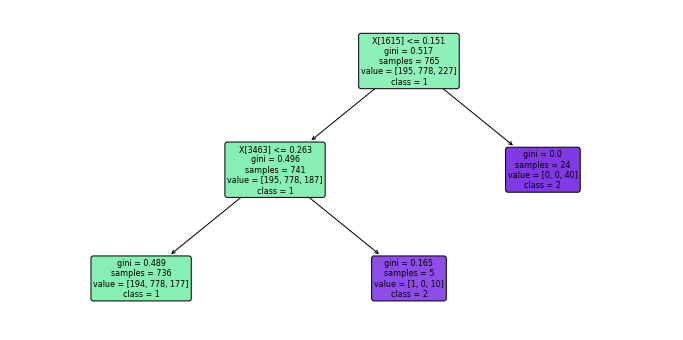

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)


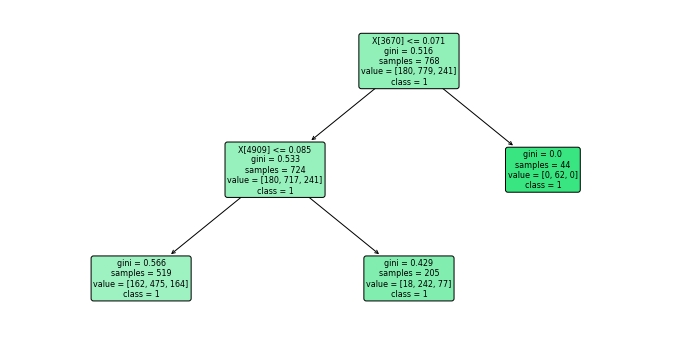

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1935803228)


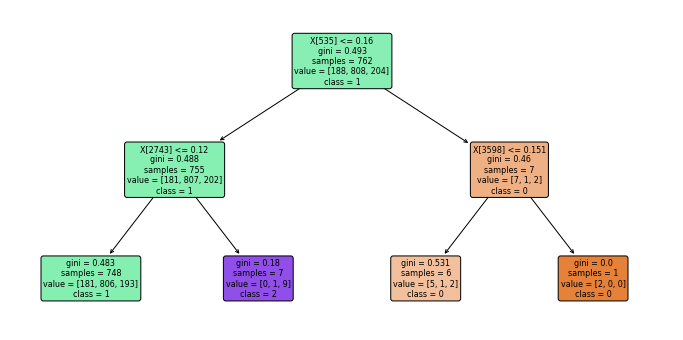

In [ ]:
from sklearn import tree


classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542)


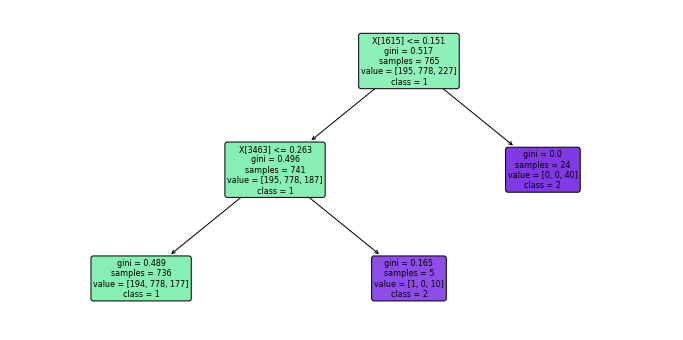

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)


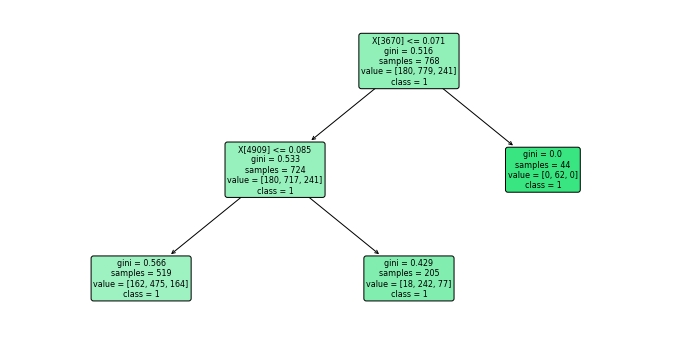

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1935803228)


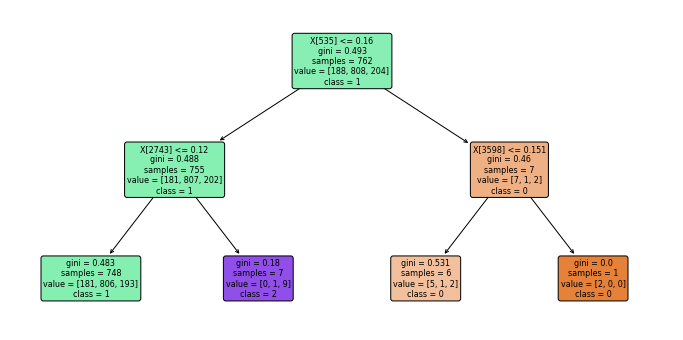

In [ ]:
from sklearn import tree


classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()
